# **Abstract**

I am taking the following steps to approach the Urban Spatial  project using clustering solution. The following steps mentions an overview of each step. Detail explanation of each steps are mentioned inline the code.

1.   I have performed exploratory data analysis to understand the correlation between different features of the dataset and identified the features.
Performed the elbow method to get the clustering point to implement K-means algorithm.
2.   Performed the K-means algorithm.
3.   Observed the internal validation for K-means clustering.
4.   Created the dendrograms for linkage methods.
5.   Performed Hierarchical clustering using appropriate linkage method.
6.   Observed the internal validation for Hierarchical clustering.
7.   Compared the clustering between K-means and Hierarchical clustering.
8.   Introduced another dataset from [OECD Data Explorer](https://data-explorer.oecd.org/) to check how other factors affect urban orientation. Here, I have exported the population density data from OECD and validated my clustering results with this factor.
9.   Final summary or conclusion based on the above observations.

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set working directory
%cd /content/drive/MyDrive/FDA/

/content/drive/MyDrive/FDA


In this step, I am importing all the libraries used in this project.

*   NumPy for mathematical operations
*   Pandas for dataframe operations
*   Seaborn and Matplotlib for statistical data visualization
*   Scikit-learn for machine learning tools(Used for K-means, hierarchical clustering, internal validation)
*   SciPy for scientific calculation (Used for dendrogram,linkage)

In [ ]:
# Include Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Here, I am importing the dataset(Table1 from paper Urban spatial order: street network orientation, configuration, and entropy) into a dataframe. I had saved the Table1 data in a .csv file called 'Urban spatial order.csv'.
Also, I have renamed feature notations to logical names for easier understanding of the terminologies.
*   φ represents orientation-order indicator
*   Ηo represents street orientation entropy
*   Ηw represents weighted street orientation entropy
*   ĩ represents median street segment length (meters)
*   ς represents average circuity
*   k̅ represents average node degree
*   Pde represents the proportion of nodes that are dead-ends
*   P4w represents the proportion of nodes that are four-way intersections

In [ ]:
# Read Urban Spatial order data
df_urban = pd.read_csv('Urban spatial order.csv')
df_urban

,Region,City,Orientation-order indicator,Street orientation entropy,Weighted street orientation entropy,Median street segment length,average circuity,Average node degree,Proportion of dead-ends,Proportion of four-way intersections
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


# **Variable selection and Scaling**

There is a scaling difference among the features of the dataset. The median street segment length column is in meters and it has values like 80/90/100 etc. where as the oriention order has values between 0 to 1. As I will be using distance based clustering techniques in the subsequent steps, I have scaled all the features using MinMaxScaler() to represent the values between 0 and 1.

In [ ]:
# Selected the columns to be scaled
#scaled_columns = ['Orientation-order indicator','Street orientation entropy', 'Weighted street orientation entropy', 'Median street segment length','average circuity','Average node degree','Proportion of dead-ends','Proportion of four-way intersections']
scaled_columns = ['Street orientation entropy', 'Weighted street orientation entropy', 'Median street segment length','average circuity','Average node degree']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it for the selected columns
df_urban[scaled_columns] = scaler.fit_transform(df_urban[scaled_columns])

#Unscaled columns - Not scaling 'Orientation-order indicator', 'Proportion of dead-ends', 'Proportion of four-way intersections' as these are already between 0 and 1.
#unscaled_columns = df_urban[['Region','City']]
unscaled_columns = df_urban[['Region','City','Orientation-order indicator', 'Proportion of dead-ends', 'Proportion of four-way intersections']]

# Concatenating the scaled DataFrame with the selected unscaled columns
df_urban_scaled = pd.concat([unscaled_columns,df_urban[scaled_columns]], axis=1)

# Display the new DataFrame with both scaled and unscaled columns
df_urban_scaled


,Region,City,Orientation-order indicator,Proportion of dead-ends,Proportion of four-way intersections,Street orientation entropy,Weighted street orientation entropy,Median street segment length,average circuity,Average node degree
0,Asia/Oceania,Bangkok,0.105,0.360,0.108,0.921948,0.912720,0.197331,0.350365,0.030833
1,Asia/Oceania,Beijing,0.335,0.135,0.241,0.729820,0.746279,0.735462,0.306569,0.530833
2,Asia/Oceania,Hanoi,0.010,0.246,0.102,0.993996,0.993911,0.196378,0.394161,0.218333
3,Asia/Oceania,Hong Kong,0.012,0.114,0.174,0.992662,0.987821,0.180172,0.919708,0.486667
4,Asia/Oceania,Jakarta,0.167,0.175,0.096,0.872582,0.841678,0.141087,0.394161,0.327500
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,0.136,0.369,0.306204,0.251015,0.352717,0.124088,0.632500
96,US/Canada,St Louis,0.276,0.098,0.374,0.782522,0.759134,0.399428,0.087591,0.680833
97,US/Canada,Toronto,0.474,0.109,0.217,0.598399,0.529093,0.380839,0.576642,0.538333
98,US/Canada,Vancouver,0.749,0.073,0.455,0.270180,0.209743,0.383699,0.080292,0.800000


The next step performs initial data analysis using describe() method to check if there are any potential anomolies, outliers and missing values.
No anomolies are found.

In [ ]:
#Understand the data
df_urban_scaled.describe()

,Orientation-order indicator,Proportion of dead-ends,Proportion of four-way intersections,Street orientation entropy,Weighted street orientation entropy,Median street segment length,average circuity,Average node degree
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.178790,0.147580,0.228080,0.846077,0.836421,0.284986,0.328321,0.479167
std,0.224408,0.080086,0.126133,0.215618,0.228632,0.133179,0.198927,0.220277
min,0.002000,0.027000,0.061000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.024000,0.083750,0.138250,0.774683,0.764885,0.197092,0.187956,0.302292
50%,0.062000,0.130500,0.191000,0.954970,0.942152,0.273832,0.302920,0.499583
75%,0.284750,0.204250,0.309500,0.983322,0.981225,0.352359,0.452555,0.633125
max,0.899000,0.395000,0.576000,1.000000,1.000000,1.000000,1.000000,1.000000


For further analysis, I am plotting boxplots for all features to see their coverage of data and number of outliers.

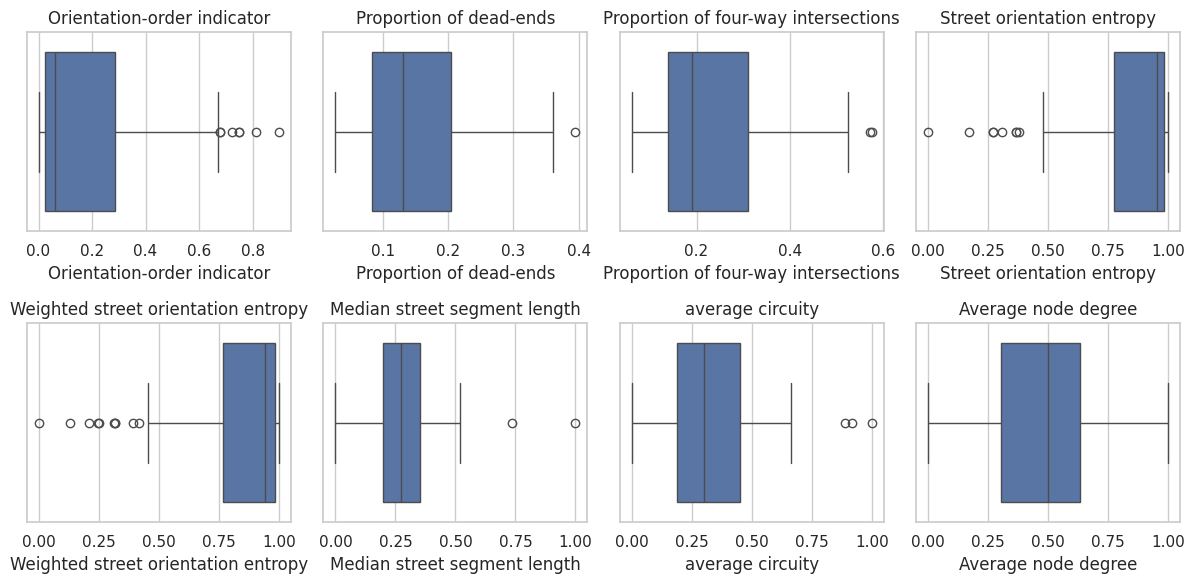

In [ ]:
#creating boxplots for descriptive analysis
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a boxplot for each feature to understand their distributions
plt.figure(figsize=(12, 6))

# Plotting a boxplot for each numerical feature in the DataFrame
for i, column in enumerate(df_urban_scaled.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(2, 4, i + 1)  # Create subplots for each boxplot
    sns.boxplot(x=df_urban_scaled[column])
    plt.title(column)

plt.tight_layout()  # Adjust the layout so that all subplots fit into the figure area
plt.show()  # Display the plots

As part of initial analysis, I am also plotting heatmap to see the correlation between the features.

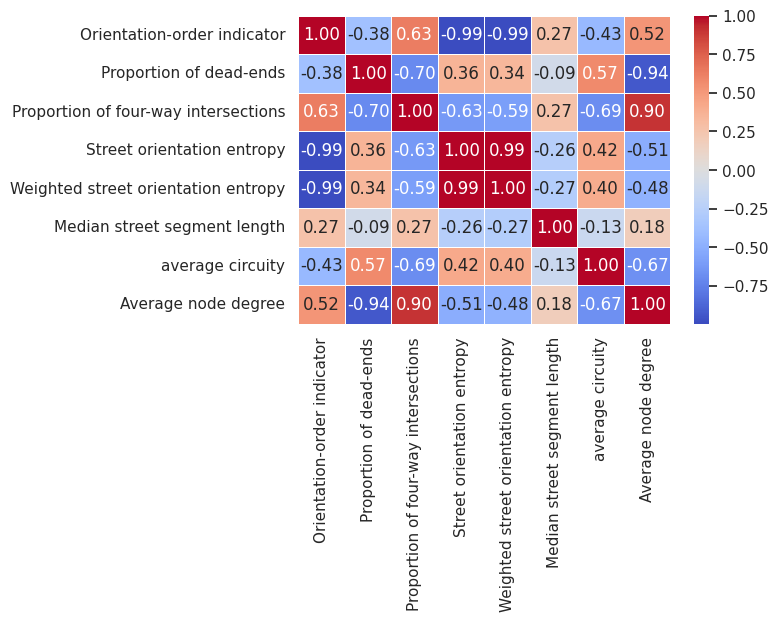

In [ ]:
#Create correlation matrix
numeric_df = df_urban_scaled.select_dtypes(include=[np.number])

#calculate the correlation matrix
corr_matrix=numeric_df.corr()

#Display correlation matrix
#corr_matrix
#Create Heatmap from the correlation matrix
plt.figure(figsize=(6,4))
# 'annot=True' annotates cells with correlation coefficients
# 'fmt =".2f"' formats the annotation to 2 decimal points
# 'cmap="coolwarm" for the color scheme
# 'linewidth=.5' for lines that separate each cell
# 'cbar_kws={"shrink":.5}' fits the colorbar nicely

sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=.5,cbar={"shrink":5})
plt.show()

I am checking the variance of the features in this step to confirm the features for clustering.

In [ ]:
# Calculate variance for all features in the DataFrame
variance_all_features = df_urban_scaled.var()

# Display the variance for all features
print("Variance of all features:")
print(variance_all_features)

Variance of all features:
Orientation-order indicator             0.050359
Proportion of dead-ends                 0.006414
Proportion of four-way intersections    0.015909
Street orientation entropy              0.046491
Weighted street orientation entropy     0.052273
Median street segment length            0.017737
average circuity                        0.039572
Average node degree                     0.048522
dtype: float64


<ipython-input-10-3926c5f8a0cc>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance_all_features = df_urban_scaled.var()


# **K-means clustering implementation**

In this step, I am performing the elbow method to identify the number of clusters. I have used all the features for clustering. From the graph, it appears that the elbow point is 3. Hence, I will use 3 as the number of clusters.

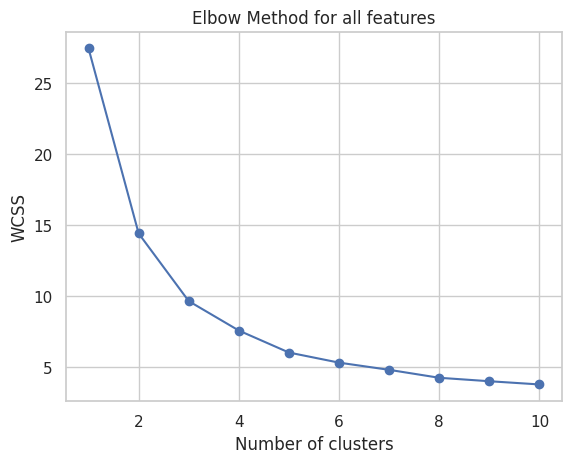

In [ ]:
#Perform the elbow method

# Correct way to select columns and create a new DataFrame
df_selected_features = df_urban_scaled.select_dtypes(include=['float64'])
#df_selected_features
k = []
wcss = []

for i in range(1, 11):
    mdl = KMeans(n_clusters=i, n_init=10, random_state=42)  # Added random_state for reproducibility
    # Fitting the model to the selected features
    mdl.fit(df_selected_features)
    k.append(i)
    wcss.append(mdl.inertia_)

plt.plot(k, wcss, marker='o')
plt.title('Elbow Method for all features')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In this step, I am plotting the K-means result in pairplot for all the selected features. The pairplot shows the correlation among all the pairs of columns based on all the columns.

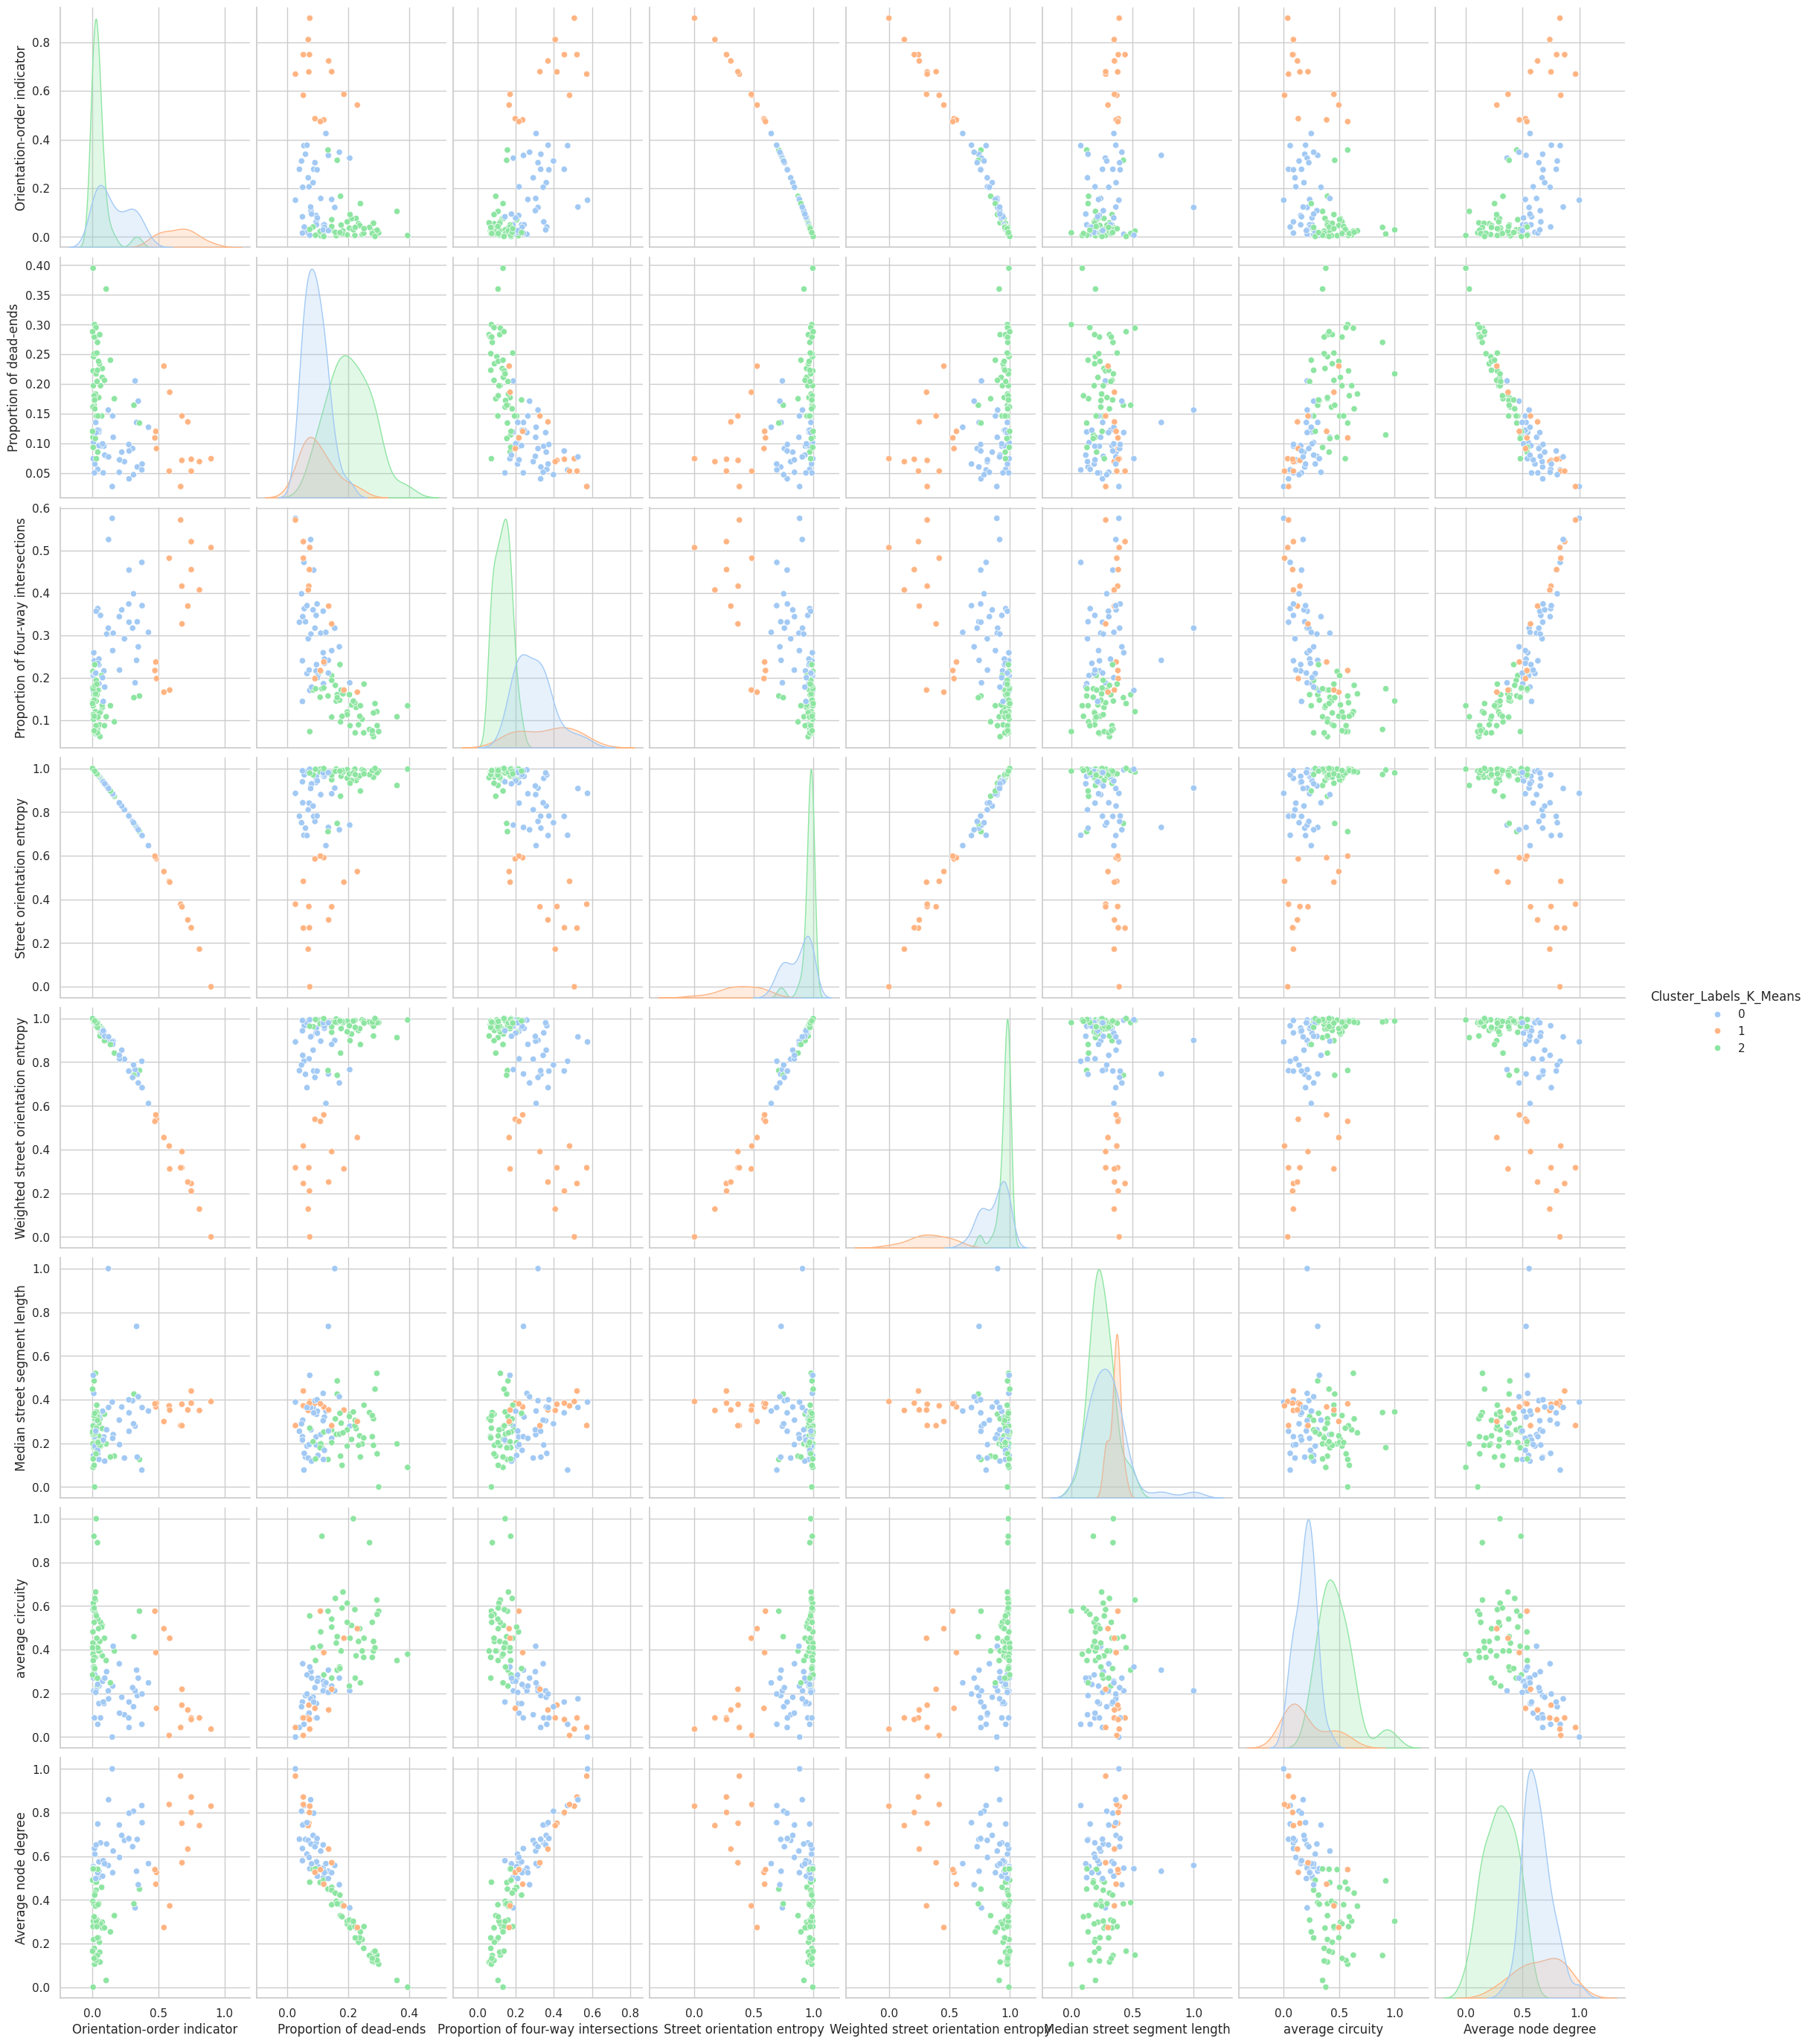

In [ ]:
#Implementating KMeans algorithm
# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit the model to the scaled data
#df_selected_features
kmeans.fit(df_selected_features)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to your DataFrame
df_selected_features['Cluster_Labels_K_Means'] = cluster_labels

# Create the pairplot
sns.pairplot(df_selected_features, hue='Cluster_Labels_K_Means', palette='pastel',height=3.5, aspect=0.8)

# Show the plot
plt.show()

Here, I have calculated the silhoutte score of the K-Means clustering.

In [ ]:
#calculate the clustering score using Silhoutte Index
metrics.silhouette_score(df_selected_features,cluster_labels)

0.7239281387789087

Here, I have calculated the calinski_harabasz of the K-Means clustering.

In [ ]:
#calculate the clustering score using CH Index
metrics.calinski_harabasz_score(df_selected_features,cluster_labels)

517.6450265384939

In this step, I am adding the cluster labels in the dataframe.

In [ ]:
# Add the cluster labels to the original DataFrame
df_urban_wth_clsLbl = df_urban_scaled.copy()
df_urban_wth_clsLbl['Cluster_Labels_K_Means'] = cluster_labels
#df_urban_wth_clsLbl
#df_urban_wth_clsLbl[df_urban_scaled['Region']=='US/Canada']
#df_urban_wth_clsLbl[df_urban_scaled['Region']=='Europe']

In [ ]:
#Checking the class label of cities of US/Canada
df_urban_wth_clsLbl[df_urban_scaled['Region']=='US/Canada']

,Region,City,Orientation-order indicator,Proportion of dead-ends,Proportion of four-way intersections,Street orientation entropy,Weighted street orientation entropy,Median street segment length,average circuity,Average node degree,Cluster_Labels_K_Means
71,US/Canada,Atlanta,0.315,0.164,0.153,0.747832,0.740189,0.425643,0.459854,0.381667,2
72,US/Canada,Baltimore,0.223,0.085,0.360,0.827885,0.855210,0.366063,0.182482,0.695000,0
73,US/Canada,Boston,0.026,0.135,0.211,0.981321,0.980379,0.256435,0.204380,0.497500,0
74,US/Canada,Charlotte,0.002,0.288,0.139,1.000000,1.000000,0.448046,0.408759,0.165000,2
75,US/Canada,Chicago,0.899,0.074,0.507,0.000000,0.000000,0.391325,0.036496,0.829167,1
76,US/Canada,Cleveland,0.486,0.091,0.198,0.585724,0.538566,0.383699,0.131387,0.525833,1
77,US/Canada,Dallas,0.305,0.091,0.317,0.757171,0.730041,0.395138,0.226277,0.643333,0
78,US/Canada,Denver,0.678,0.071,0.416,0.367578,0.316644,0.378932,0.145985,0.750833,1
79,US/Canada,Detroit,0.582,0.053,0.482,0.482989,0.416103,0.371783,0.007299,0.836667,1
80,US/Canada,Honolulu,0.034,0.252,0.185,0.975317,0.979026,0.374643,0.452555,0.277500,2


In [ ]:
#Checking the class label of cities of Europe
df_urban_wth_clsLbl[df_urban_scaled['Region']=='Europe']

,Region,City,Orientation-order indicator,Proportion of dead-ends,Proportion of four-way intersections,Street orientation entropy,Weighted street orientation entropy,Median street segment length,average circuity,Average node degree,Cluster_Labels_K_Means
23,Europe,Amsterdam,0.071,0.146,0.205,0.947965,0.937077,0.203051,0.503650,0.457500,2
24,Europe,Athens,0.041,0.056,0.363,0.970647,0.966847,0.153956,0.058394,0.747500,0
25,Europe,Barcelona,0.108,0.078,0.303,0.919947,0.918133,0.261678,0.299270,0.655833,0
26,Europe,Berlin,0.011,0.118,0.259,0.993329,0.992558,0.428503,0.211679,0.545000,0
27,Europe,Budapest,0.050,0.096,0.231,0.963976,0.956022,0.332698,0.153285,0.574167,0
28,Europe,Copenhagen,0.029,0.146,0.194,0.979987,0.979702,0.261201,0.270073,0.444167,2
29,Europe,Dublin,0.024,0.279,0.068,0.983322,0.972936,0.230219,0.364964,0.120000,2
30,Europe,Glasgow,0.047,0.238,0.109,0.965977,0.953992,0.234032,0.496350,0.226667,2
31,Europe,Helsinki,0.006,0.395,0.134,0.996664,0.993234,0.089609,0.379562,0.000000,2
32,Europe,Kiev,0.014,0.164,0.160,0.990660,0.981732,0.485701,0.306569,0.387500,2


Here, I have renamed the cluster labels to a logical name. In this step, I am comparing the clustering labels between US/Canada and Europe. As mentioned in the paper, European cities have comparatively bad orientation that US/Canada cities, I am labelling the cluster labels  as -  If the cluster labe is 0, the logical name is "Good Orientation",if the cluster label is 1, the logical name is "Moderate Orientation",if the cluster label is 2, the logical name is "Bad Orientation". This is done for ease of understanding.

In [ ]:
#Rename the cluster labels
# Define a mapping from original labels to the new names
label_mapping = {0: 'Good Orientation', 1: 'Moderate Orientation', 2: 'Bad Orientation' }

# Replace the cluster labels with the new names
df_urban_wth_clsLbl['Cluster_Labels_K_Means'] = df_urban_wth_clsLbl['Cluster_Labels_K_Means'].replace(label_mapping)
df_urban_wth_clsLbl

,Region,City,Orientation-order indicator,Proportion of dead-ends,Proportion of four-way intersections,Street orientation entropy,Weighted street orientation entropy,Median street segment length,average circuity,Average node degree,Cluster_Labels_K_Means
0,Asia/Oceania,Bangkok,0.105,0.360,0.108,0.921948,0.912720,0.197331,0.350365,0.030833,Bad Orientation
1,Asia/Oceania,Beijing,0.335,0.135,0.241,0.729820,0.746279,0.735462,0.306569,0.530833,Good Orientation
2,Asia/Oceania,Hanoi,0.010,0.246,0.102,0.993996,0.993911,0.196378,0.394161,0.218333,Bad Orientation
3,Asia/Oceania,Hong Kong,0.012,0.114,0.174,0.992662,0.987821,0.180172,0.919708,0.486667,Bad Orientation
4,Asia/Oceania,Jakarta,0.167,0.175,0.096,0.872582,0.841678,0.141087,0.394161,0.327500,Bad Orientation
...,...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,0.136,0.369,0.306204,0.251015,0.352717,0.124088,0.632500,Moderate Orientation
96,US/Canada,St Louis,0.276,0.098,0.374,0.782522,0.759134,0.399428,0.087591,0.680833,Good Orientation
97,US/Canada,Toronto,0.474,0.109,0.217,0.598399,0.529093,0.380839,0.576642,0.538333,Moderate Orientation
98,US/Canada,Vancouver,0.749,0.073,0.455,0.270180,0.209743,0.383699,0.080292,0.800000,Moderate Orientation


Conclusion of K-means clustering : I have used all the features for K-Means clustering.  It aligns with the findings in the research paper as higher orientation order leads to good orientation/navigation ability.

# **Hierarchical clustering implementation**

In this step, I am showing the linkage methods for all types linkage method i.e. 'complete','single','ward' and 'average'.

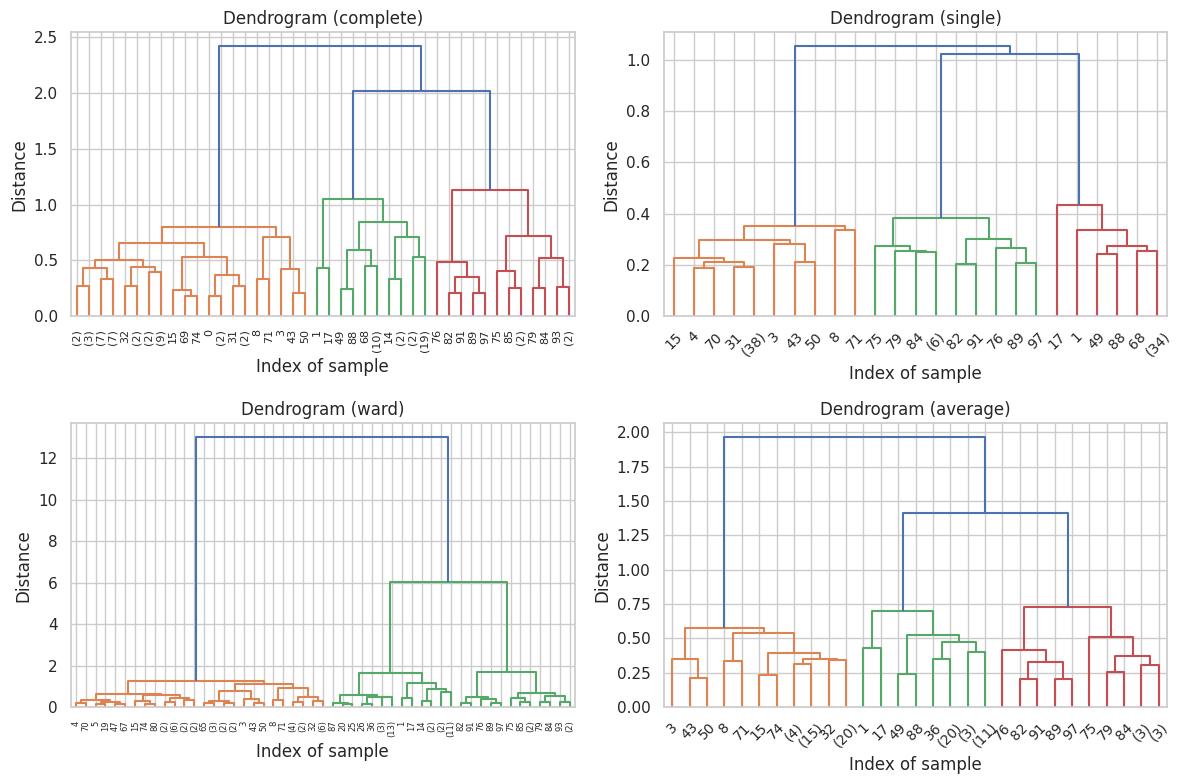

In [ ]:
# Calculate all types of linkage method
Linkage_methods = ['complete', 'single', 'ward', 'average']

# Set up the matplotlib figure and axes for a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Plot the dendrograms in a loop
for i, method in enumerate(Linkage_methods):
    # Perform the hierarchical clustering using the specified linkage method
    linked = linkage(df_selected_features, method=method, metric='euclidean')

    # Plot the dendrogram on the ith subplot
    dendrogram(linked, ax=axes[i], truncate_mode='level', p=5)
    axes[i].set_title('Dendrogram ({})'.format(method))
    axes[i].set_xlabel('Index of sample')
    axes[i].set_ylabel('Distance')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

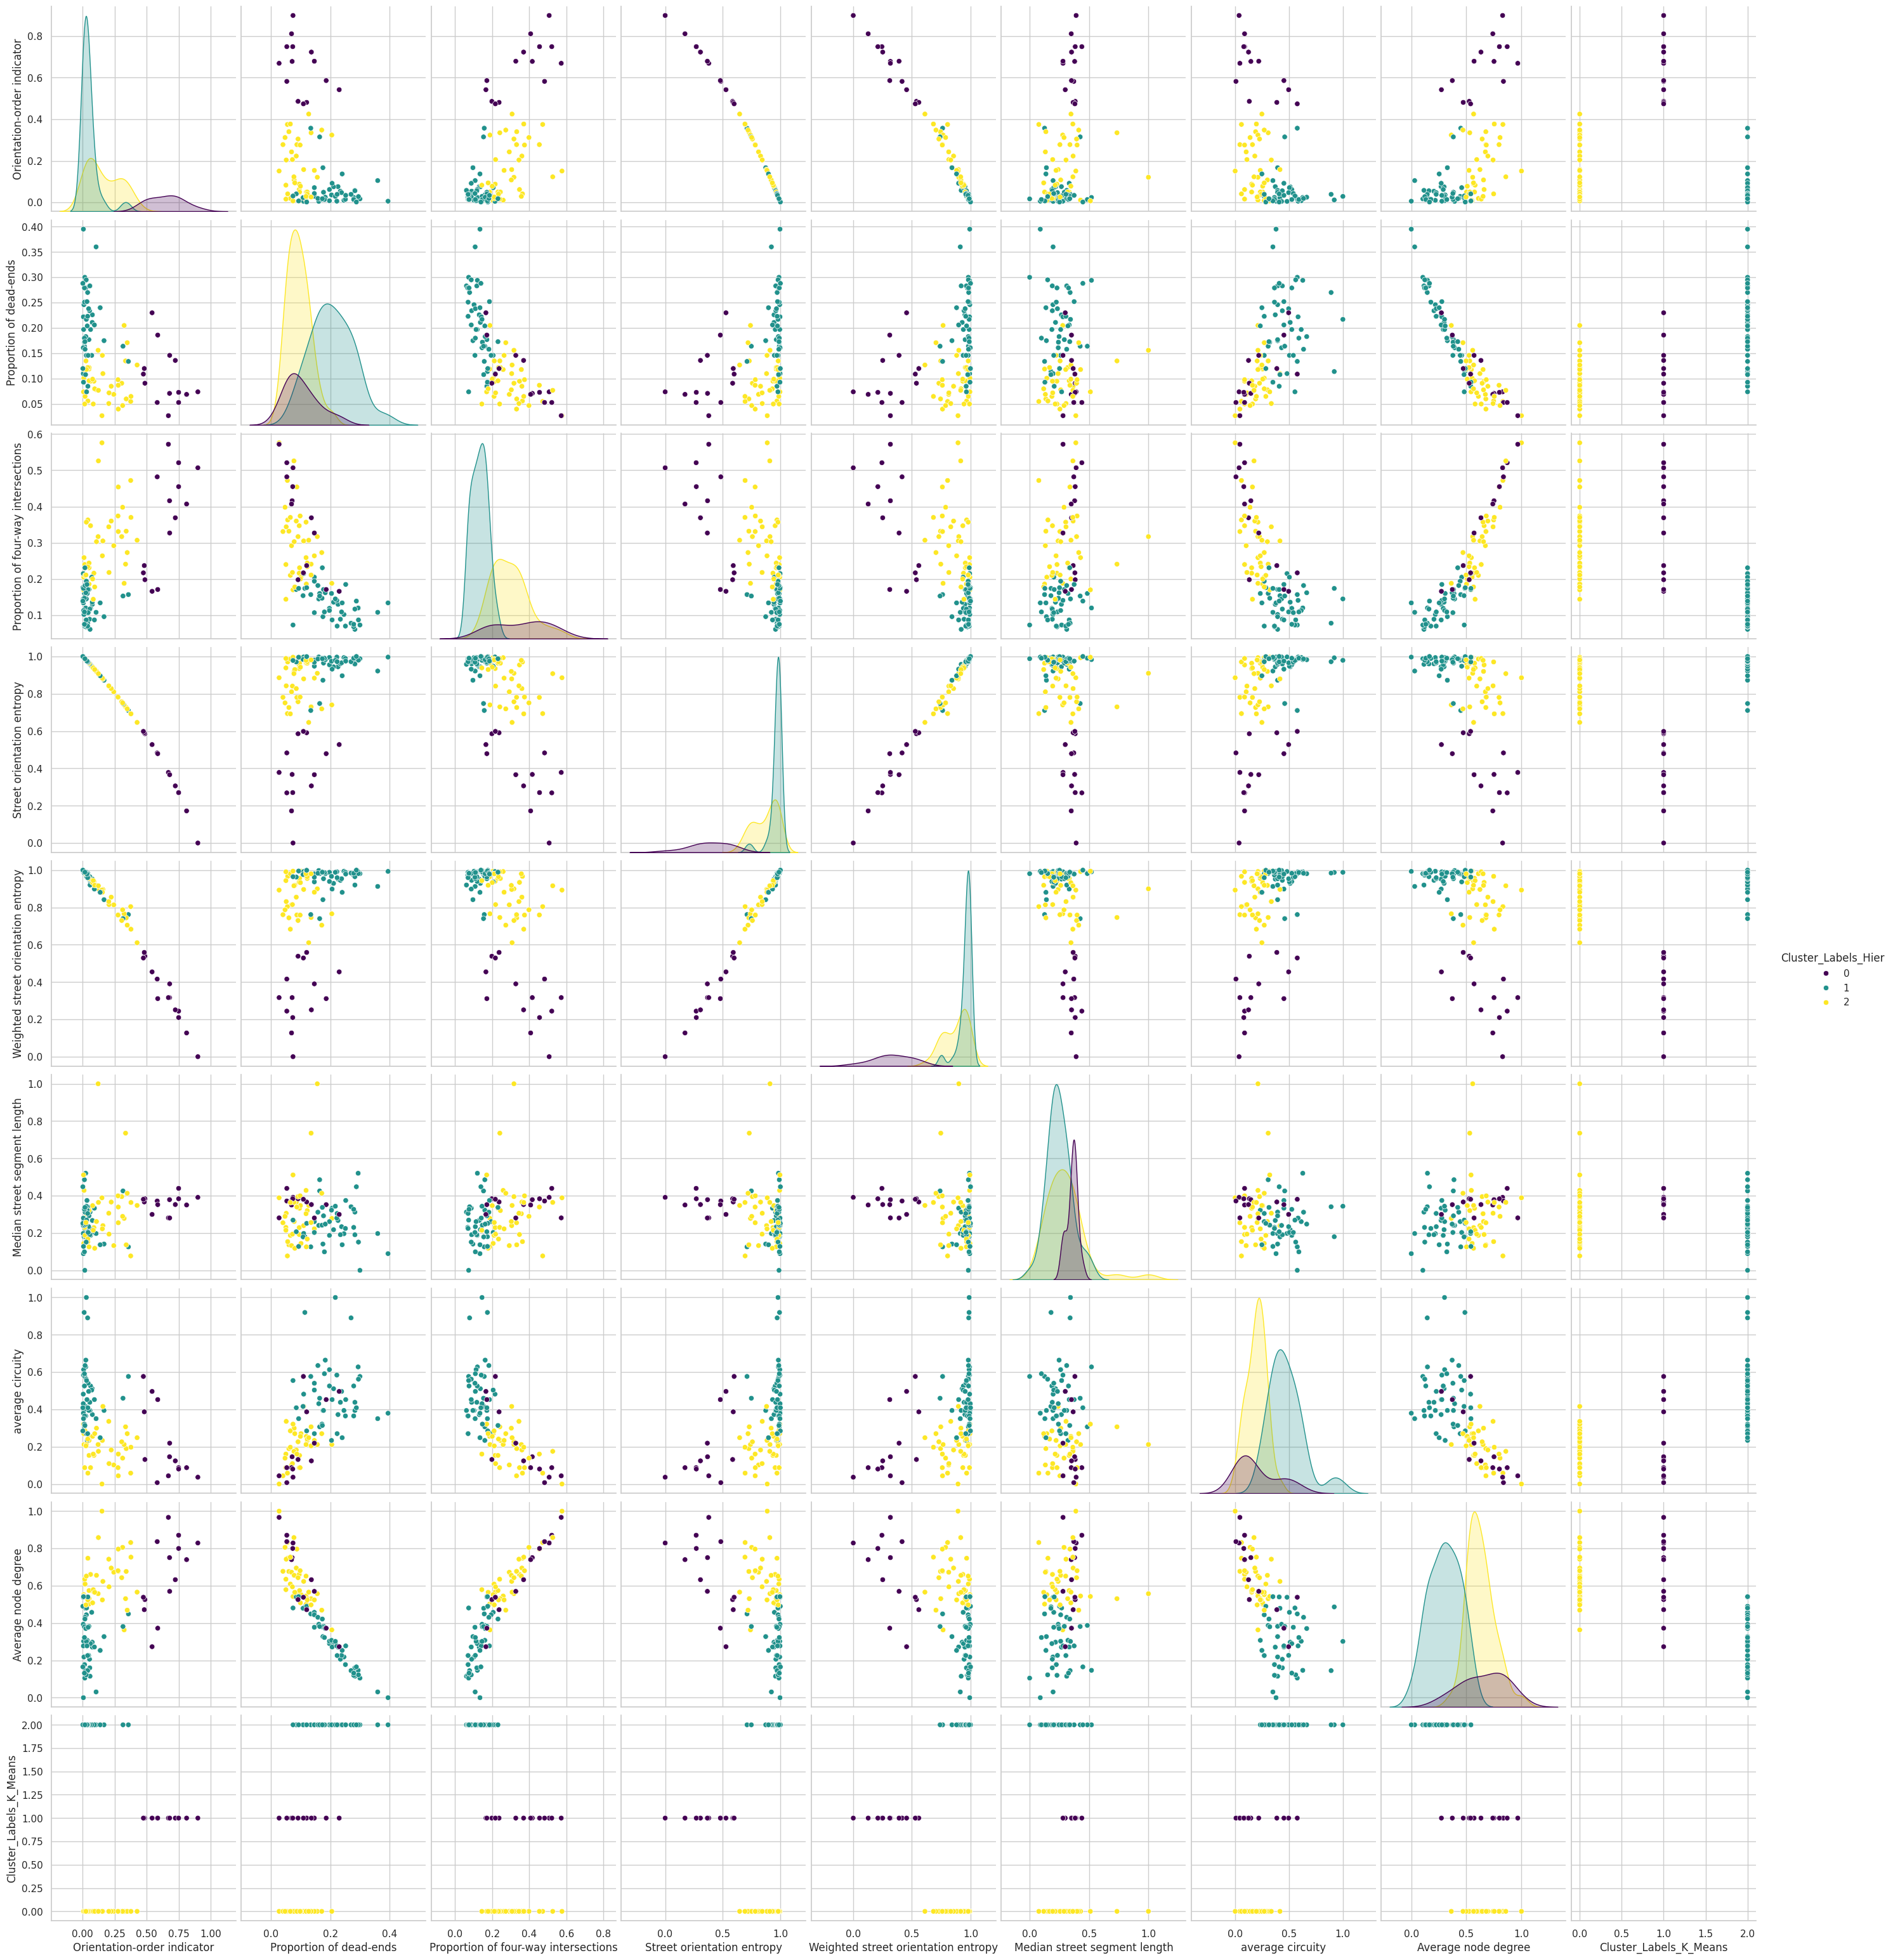

In [ ]:
#Creating pairplot for Hierarchical clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
Cluster_Labels_Hier = hierarchical_cluster.fit_predict(df_selected_features)
# Add the cluster labels to your DataFrame
df_selected_features['Cluster_Labels_Hier'] = Cluster_Labels_Hier

#Plot the pairplot
sns.pairplot(df_selected_features, hue='Cluster_Labels_Hier', palette='viridis', height=3.5, aspect=0.9)
plt.show()

In this step. I have added the cluster labels for hierarchical clustering.

In [ ]:
#add the cluster labels in the data
df_urban_wth_clsLbl['Cluster_Labels_hier'] = Cluster_Labels_Hier
df_urban_wth_clsLbl

,Region,City,Orientation-order indicator,Proportion of dead-ends,Proportion of four-way intersections,Street orientation entropy,Weighted street orientation entropy,Median street segment length,average circuity,Average node degree,Cluster_Labels_K_Means,Cluster_Labels_hier
0,Asia/Oceania,Bangkok,0.105,0.360,0.108,0.921948,0.912720,0.197331,0.350365,0.030833,Bad Orientation,1
1,Asia/Oceania,Beijing,0.335,0.135,0.241,0.729820,0.746279,0.735462,0.306569,0.530833,Good Orientation,2
2,Asia/Oceania,Hanoi,0.010,0.246,0.102,0.993996,0.993911,0.196378,0.394161,0.218333,Bad Orientation,1
3,Asia/Oceania,Hong Kong,0.012,0.114,0.174,0.992662,0.987821,0.180172,0.919708,0.486667,Bad Orientation,1
4,Asia/Oceania,Jakarta,0.167,0.175,0.096,0.872582,0.841678,0.141087,0.394161,0.327500,Bad Orientation,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,0.136,0.369,0.306204,0.251015,0.352717,0.124088,0.632500,Moderate Orientation,0
96,US/Canada,St Louis,0.276,0.098,0.374,0.782522,0.759134,0.399428,0.087591,0.680833,Good Orientation,2
97,US/Canada,Toronto,0.474,0.109,0.217,0.598399,0.529093,0.380839,0.576642,0.538333,Moderate Orientation,0
98,US/Canada,Vancouver,0.749,0.073,0.455,0.270180,0.209743,0.383699,0.080292,0.800000,Moderate Orientation,0


In [ ]:
#Checking the class label of cities of US/Canada
df_urban_wth_clsLbl[df_urban_scaled['Region']=='US/Canada']

,Region,City,Orientation-order indicator,Proportion of dead-ends,Proportion of four-way intersections,Street orientation entropy,Weighted street orientation entropy,Median street segment length,average circuity,Average node degree,Cluster_Labels_K_Means,Cluster_Labels_hier
71,US/Canada,Atlanta,0.315,0.164,0.153,0.747832,0.740189,0.425643,0.459854,0.381667,Bad Orientation,1
72,US/Canada,Baltimore,0.223,0.085,0.360,0.827885,0.855210,0.366063,0.182482,0.695000,Good Orientation,2
73,US/Canada,Boston,0.026,0.135,0.211,0.981321,0.980379,0.256435,0.204380,0.497500,Good Orientation,2
74,US/Canada,Charlotte,0.002,0.288,0.139,1.000000,1.000000,0.448046,0.408759,0.165000,Bad Orientation,1
75,US/Canada,Chicago,0.899,0.074,0.507,0.000000,0.000000,0.391325,0.036496,0.829167,Moderate Orientation,0
76,US/Canada,Cleveland,0.486,0.091,0.198,0.585724,0.538566,0.383699,0.131387,0.525833,Moderate Orientation,0
77,US/Canada,Dallas,0.305,0.091,0.317,0.757171,0.730041,0.395138,0.226277,0.643333,Good Orientation,2
78,US/Canada,Denver,0.678,0.071,0.416,0.367578,0.316644,0.378932,0.145985,0.750833,Moderate Orientation,0
79,US/Canada,Detroit,0.582,0.053,0.482,0.482989,0.416103,0.371783,0.007299,0.836667,Moderate Orientation,0
80,US/Canada,Honolulu,0.034,0.252,0.185,0.975317,0.979026,0.374643,0.452555,0.277500,Bad Orientation,1


In [ ]:
#Checking the class label of cities of Europe
df_urban_wth_clsLbl[df_urban_scaled['Region']=='Europe']

,Region,City,Orientation-order indicator,Proportion of dead-ends,Proportion of four-way intersections,Street orientation entropy,Weighted street orientation entropy,Median street segment length,average circuity,Average node degree,Cluster_Labels_K_Means,Cluster_Labels_hier
23,Europe,Amsterdam,0.071,0.146,0.205,0.947965,0.937077,0.203051,0.503650,0.457500,Bad Orientation,1
24,Europe,Athens,0.041,0.056,0.363,0.970647,0.966847,0.153956,0.058394,0.747500,Good Orientation,2
25,Europe,Barcelona,0.108,0.078,0.303,0.919947,0.918133,0.261678,0.299270,0.655833,Good Orientation,2
26,Europe,Berlin,0.011,0.118,0.259,0.993329,0.992558,0.428503,0.211679,0.545000,Good Orientation,2
27,Europe,Budapest,0.050,0.096,0.231,0.963976,0.956022,0.332698,0.153285,0.574167,Good Orientation,2
28,Europe,Copenhagen,0.029,0.146,0.194,0.979987,0.979702,0.261201,0.270073,0.444167,Bad Orientation,1
29,Europe,Dublin,0.024,0.279,0.068,0.983322,0.972936,0.230219,0.364964,0.120000,Bad Orientation,1
30,Europe,Glasgow,0.047,0.238,0.109,0.965977,0.953992,0.234032,0.496350,0.226667,Bad Orientation,1
31,Europe,Helsinki,0.006,0.395,0.134,0.996664,0.993234,0.089609,0.379562,0.000000,Bad Orientation,1
32,Europe,Kiev,0.014,0.164,0.160,0.990660,0.981732,0.485701,0.306569,0.387500,Bad Orientation,1


In this step, I am comparing the clustering labels between US/Canada and Europe. As mentioned in the paper, European cities have comparatively bad orientation that US/Canada cities, I am labelling the cluster labels using logical names. Where 0 means Good orientation, 1 means Moderate orientation and 2 means Bad orientation.

In [ ]:
#Rename the cluster labels
# Define a mapping from original labels to the new names
hier_label_mapping = {0: 'Good Orientation', 1: 'Moderate Orientation', 2:'Bad Orientation'}

# Replace the cluster labels with the new names
df_urban_wth_clsLbl['Cluster_Labels_hier'] = df_urban_wth_clsLbl['Cluster_Labels_hier'].replace(hier_label_mapping)
df_urban_wth_clsLbl

,Region,City,Orientation-order indicator,Proportion of dead-ends,Proportion of four-way intersections,Street orientation entropy,Weighted street orientation entropy,Median street segment length,average circuity,Average node degree,Cluster_Labels_K_Means,Cluster_Labels_hier
0,Asia/Oceania,Bangkok,0.105,0.360,0.108,0.921948,0.912720,0.197331,0.350365,0.030833,Bad Orientation,Moderate Orientation
1,Asia/Oceania,Beijing,0.335,0.135,0.241,0.729820,0.746279,0.735462,0.306569,0.530833,Good Orientation,Bad Orientation
2,Asia/Oceania,Hanoi,0.010,0.246,0.102,0.993996,0.993911,0.196378,0.394161,0.218333,Bad Orientation,Moderate Orientation
3,Asia/Oceania,Hong Kong,0.012,0.114,0.174,0.992662,0.987821,0.180172,0.919708,0.486667,Bad Orientation,Moderate Orientation
4,Asia/Oceania,Jakarta,0.167,0.175,0.096,0.872582,0.841678,0.141087,0.394161,0.327500,Bad Orientation,Moderate Orientation
...,...,...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,0.136,0.369,0.306204,0.251015,0.352717,0.124088,0.632500,Moderate Orientation,Good Orientation
96,US/Canada,St Louis,0.276,0.098,0.374,0.782522,0.759134,0.399428,0.087591,0.680833,Good Orientation,Bad Orientation
97,US/Canada,Toronto,0.474,0.109,0.217,0.598399,0.529093,0.380839,0.576642,0.538333,Moderate Orientation,Good Orientation
98,US/Canada,Vancouver,0.749,0.073,0.455,0.270180,0.209743,0.383699,0.080292,0.800000,Moderate Orientation,Good Orientation


In this step, I am calculating silhoutte index for hierarchical clustering.

In [ ]:
#Evaluate the Hierarchical Clustering using Silhoutte Score
#metrics.silhouette_score(df_urban_scaled[["Orientation-order indicator", "Median street segment length"]],cluster_labels)
metrics.silhouette_score(df_selected_features,Cluster_Labels_Hier)

0.8005059776834037

In this step, I am calculating calinski_harabasz_score for hierarchical clustering.

In [ ]:
#Evaluate the Hierarchical Clustering using Silhoutte Score
#metrics.calinski_harabasz_score(df_urban_scaled[["Orientation-order indicator", "Median street segment length"]],cluster_labels)
metrics.calinski_harabasz_score(df_selected_features,Cluster_Labels_Hier)

752.2623637937039

Conclusion : Here, I am seeing the silhoutte index and calinski_harabasz_score are different for both the clustering methods. Also, the interpretaion of 0,1,2 as Good, bad and moderate orientation are different. With this clustering information we will not be able justify whether the orientation of a city is good or bad. Hence, we will look into another factor in the next section.

## **Visualizations and Insights**

In this step, I am adding a dataset of cities with population density from OECD Data explorer(Year 2019). The population density is expressed number of persons per square kilometer. As per the hypothesis,if the population density is low, the city's orientation order should be good.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving City_wise_population_density.csv to City_wise_population_density (5).csv


Load the external dataset into dataframe.

In [ ]:
#Load the data into csv
df_ppltn_dnsty = pd.read_csv('City_wise_population_density.csv')
df_ppltn_dnsty

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TERR@DF_DENSITY(1.0),Population and built-up density - Cities and FUAs,I,NZL01C,Auckland,A,Annual,POP_DEN,Population density,...,2019,NaN,2379,NaN,A,Normal value,0,Units,0,Zero
1,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TERR@DF_DENSITY(1.0),Population and built-up density - Cities and FUAs,I,ES033C,"Puerto de Santa María, El",A,Annual,POP_DEN,Population density,...,2019,NaN,554,NaN,A,Normal value,0,Units,0,Zero
2,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TERR@DF_DENSITY(1.0),Population and built-up density - Cities and FUAs,I,FR055C,Lorient,A,Annual,POP_DEN,Population density,...,2019,NaN,2610,NaN,A,Normal value,0,Units,0,Zero
3,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TERR@DF_DENSITY(1.0),Population and built-up density - Cities and FUAs,I,UK593C,St. Helens,A,Annual,POP_DEN,Population density,...,2019,NaN,1327,NaN,A,Normal value,0,Units,0,Zero
4,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TERR@DF_DENSITY(1.0),Population and built-up density - Cities and FUAs,I,IT028C,Brescia,A,Annual,POP_DEN,Population density,...,2019,NaN,2170,NaN,A,Normal value,0,Units,0,Zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TERR@DF_DENSITY(1.0),Population and built-up density - Cities and FUAs,I,USA154C,Merced,A,Annual,POP_DEN,Population density,...,2019,NaN,54,NaN,A,Normal value,0,Units,0,Zero
1375,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TERR@DF_DENSITY(1.0),Population and built-up density - Cities and FUAs,I,ES077C,Mataró,A,Annual,POP_DEN,Population density,...,2019,NaN,5743,NaN,A,Normal value,0,Units,0,Zero
1376,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TERR@DF_DENSITY(1.0),Population and built-up density - Cities and FUAs,I,FR040C,Bayonne,A,Annual,POP_DEN,Population density,...,2019,NaN,1788,NaN,A,Normal value,0,Units,0,Zero
1377,DATAFLOW,OECD.CFE.EDS:DSD_FUA_TERR@DF_DENSITY(1.0),Population and built-up density - Cities and FUAs,I,IT006C,Genova,A,Annual,POP_DEN,Population density,...,2019,NaN,2372,NaN,A,Normal value,0,Units,0,Zero


Rename the column names for matching with the existing dataframe. I have renamed 'Reference area' to 'City' and 'OBS_VALUE' to 'Population Density'. I am also dropping all the records where population density is null.

In [ ]:
# Step 1: Rename the column names
df_ppltn_dnsty = df_ppltn_dnsty.rename(columns={'Reference area': 'City', 'OBS_VALUE': 'Population Density'})

# Step 2 and 3: Create a new dataframe with only the two columns and non-null Population Density
# Then, overwrite df_ppltn_dnsty with this new dataframe
df_ppltn_dnsty = df_ppltn_dnsty[['City', 'Population Density']].dropna(subset=['Population Density'])

df_ppltn_dnsty

,City,Population Density
0,Auckland,2379
1,"Puerto de Santa María, El",554
2,Lorient,2610
3,St. Helens,1327
4,Brescia,2170
...,...,...
1374,Merced,54
1375,Mataró,5743
1376,Bayonne,1788
1377,Genova,2372


Here, I am clustering the external dataset based on population density.
The cities with high population is clustered as 'High' and the cities with low population as 'Low'.

In [ ]:
#Next,for ease of understanding, I am going to cluster the dataset for high and low popuation density
#Implementating KMeans algorithm
# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit the model to the scaled data
#df_selected_features
X=df_ppltn_dnsty["Population Density"].values.reshape(-1,1)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df_ppltn_dnsty['Ppltn_dnsty_Cluster_Labels'] = cluster_labels
df_ppltn_dnsty


,City,Population Density,Ppltn_dnsty_Cluster_Labels
0,Auckland,2379,1
1,"Puerto de Santa María, El",554,0
2,Lorient,2610,1
3,St. Helens,1327,0
4,Brescia,2170,1
...,...,...,...
1374,Merced,54,0
1375,Mataró,5743,1
1376,Bayonne,1788,0
1377,Genova,2372,1


Here, I am renaming the cluster labels. For 1, I am labelling as 'High'. For 0, I am labelling as 'Low'.

In [ ]:
#Rename the cluster labels
# Define a mapping from original labels to the new names
label_mapping = {0: 'Low', 1: 'High'}

# Replace the cluster labels with the new names
df_ppltn_dnsty['Ppltn_dnsty_Cluster_Labels'] = df_ppltn_dnsty['Ppltn_dnsty_Cluster_Labels'].replace(label_mapping)
df_ppltn_dnsty

,City,Population Density,Ppltn_dnsty_Cluster_Labels
0,Auckland,2379,High
1,"Puerto de Santa María, El",554,Low
2,Lorient,2610,High
3,St. Helens,1327,Low
4,Brescia,2170,High
...,...,...,...
1374,Merced,54,Low
1375,Mataró,5743,High
1376,Bayonne,1788,Low
1377,Genova,2372,High


Here, I have merged the external dataset(dataset with population density) with the dataset from the paper based on the city. It gives only 35 matches. I am going to compare the clustering results with population density.

In [ ]:
#Now, I am going to join this dataframe with df_urban_wth_clsLbl based city and reference area.

left = df_urban_wth_clsLbl
right = df_ppltn_dnsty
df_urban_merged = pd.merge(left, right, how="left", left_on=["City"], right_on=["City"])
df_urban_merged

#df_urban_merged[df_urban_merged['Population Density'].notnull()].count() -- 35 records got matched using the city name


,Region,City,Orientation-order indicator,Proportion of dead-ends,Proportion of four-way intersections,Street orientation entropy,Weighted street orientation entropy,Median street segment length,average circuity,Average node degree,Cluster_Labels_K_Means,Cluster_Labels_hier,Population Density,Ppltn_dnsty_Cluster_Labels
0,Asia/Oceania,Bangkok,0.105,0.360,0.108,0.921948,0.912720,0.197331,0.350365,0.030833,Bad Orientation,Moderate Orientation,NaN,NaN
1,Asia/Oceania,Beijing,0.335,0.135,0.241,0.729820,0.746279,0.735462,0.306569,0.530833,Good Orientation,Bad Orientation,NaN,NaN
2,Asia/Oceania,Hanoi,0.010,0.246,0.102,0.993996,0.993911,0.196378,0.394161,0.218333,Bad Orientation,Moderate Orientation,NaN,NaN
3,Asia/Oceania,Hong Kong,0.012,0.114,0.174,0.992662,0.987821,0.180172,0.919708,0.486667,Bad Orientation,Moderate Orientation,NaN,NaN
4,Asia/Oceania,Jakarta,0.167,0.175,0.096,0.872582,0.841678,0.141087,0.394161,0.327500,Bad Orientation,Moderate Orientation,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,US/Canada,Seattle,0.723,0.136,0.369,0.306204,0.251015,0.352717,0.124088,0.632500,Moderate Orientation,Good Orientation,255.0,Low
97,US/Canada,St Louis,0.276,0.098,0.374,0.782522,0.759134,0.399428,0.087591,0.680833,Good Orientation,Bad Orientation,NaN,NaN
98,US/Canada,Toronto,0.474,0.109,0.217,0.598399,0.529093,0.380839,0.576642,0.538333,Moderate Orientation,Good Orientation,2062.0,High
99,US/Canada,Vancouver,0.749,0.073,0.455,0.270180,0.209743,0.383699,0.080292,0.800000,Moderate Orientation,Good Orientation,1627.0,Low


In this phase of analysis, I evaluated the relationship between city orientation and population density. Based on my initial hypothesis, cities characterized by well-planned orientation were expected to exhibit lower population densities. However, the findings were contrary to expectations: out of the original cluster of cities, only 35 cities aligned with the hypothesis, and within this subset, just 21 cities demonstrated good or moderate orientation according to one or more clustering methods. This translates to approximately 20% of the cities showing a correlation between low population density and favorable orientation, challenging the original hypothesis. It suggests that city orientation may be influenced by factors other than population density. Throughout this project, while various factors have been explored in relation to city orientation, pinpointing the precise features that determine city layout remains the primary hurdle.

In [ ]:
# Correcting the logical conditions and ensuring proper use of parentheses
cndtn_ppltn_dnsty = ((df_urban_merged['Cluster_Labels_K_Means'] == 'Good Orientation') & (df_urban_merged['Ppltn_dnsty_Cluster_Labels'] == 'Low')) | \
                    ((df_urban_merged['Cluster_Labels_hier'] == 'Good Orientation') & (df_urban_merged['Ppltn_dnsty_Cluster_Labels'] == 'Low')) | \
                    ((df_urban_merged['Cluster_Labels_K_Means'] == 'Moderate Orientation') & (df_urban_merged['Ppltn_dnsty_Cluster_Labels'] == 'Low')) | \
                    ((df_urban_merged['Cluster_Labels_hier'] == 'Moderate Orientation') & (df_urban_merged['Ppltn_dnsty_Cluster_Labels'] == 'Low'))

# Count how many times the condition is True
ppltn_dnsty_matches = cndtn_ppltn_dnsty.sum()

# Calculate the total number of elements (rows) in the DataFrame
total_elements = df_urban_merged.shape[0]
merged_elements = df_urban_merged['Ppltn_dnsty_Cluster_Labels'].notna().sum()

# Calculate the percentage of specific matches
percentage_merged =  (merged_elements / total_elements) * 100
percentage_ppltn_matches = (ppltn_dnsty_matches / total_elements) * 100

# Display the results
print(f"Number of merged elements: {merged_elements}")
print(f"Percentage of merged elements: {percentage_merged:.2f}%")
print(f"Number of population matches: {ppltn_dnsty_matches}")
print(f"Percentage of population matches: {percentage_ppltn_matches:.2f}%")


Number of merged elements: 35
Percentage of merged elements: 34.65%
Number of population matches: 21
Percentage of population matches: 20.79%
